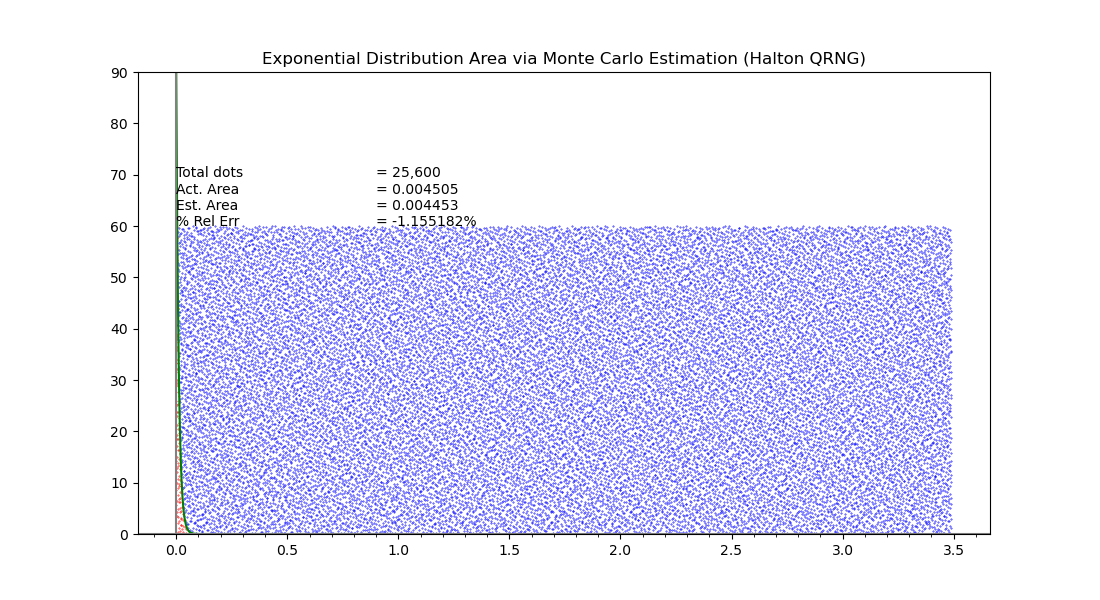

In [149]:
# mc_exp_dist.ipynb




# mc_std_normal.ipynb

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from numba import float64, vectorize
from matplotlib.ticker import AutoMinorLocator
from scipy import integrate

@vectorize([float64(float64)], nopython=True)
def f(x):
    return 90*np.exp(-90*x) 


@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p):
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_std_normal(ax):
    iterations_sqrt = 160
    iterations = iterations_sqrt**2

    primes = [2, 3]

    x = halton(np.arange(iterations), primes[0]) *3.489521000001
    
    y = halton(np.arange(iterations), primes[1]) * 60

    d = f(x) - y

    x_in = x[d >= 0.0]
    y_in = y[d >= 0.0]
    
    x_out = x[d < 0.0]
    y_out = y[d < 0.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    act_x = np.linspace(0, 1, 1000)
    act_y = f(act_x)
    ax.plot(act_x, act_y, color="green")
    
    est_area = np.count_nonzero(d >= 0.0) / iterations
    
    act_area = np.log(2/3)/-90
   
    

    err = (est_area - act_area) / act_area

    ax.set_title("Exponential Distribution Area via Monte Carlo Estimation (Halton QRNG)")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.set_ylim(0, 90)
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")

    ax.text(0, 60, "Total dots\nAct. Area\n" "Est. Area\n% Rel Err", ha="left")

    ax.text(
        .9,
        60,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )


def main():
    plt.close("all")
    fig = plt.figure(label=" ")
    fig.set_size_inches(11, 6)
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])
    plot_std_normal(ax)

    plt.show()


main()